In [1]:
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    import pandas
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    from scipy import stats
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    import nltk
    from nltk.stem import WordNetLemmatizer




In [2]:
## Input daily data Dropbox (this should be automatically scraped ideally, but I did not have time to implement this)
sentences_May8 = ["CEO Drew Houston on Q1 2020 Results - Earnings Call Transcript | Seeking Alpha ", 
                "Dropbox, Inc. (NASDAQ: DBX) Q1 2020 Earnings Call Transcript",
                "Dropbox quarterly results beat estimates: Dropbox Inc's quarterly revenue and profit beat Wall Street estimates on Thursday, as the file-hosting company signed up more paying customers on its platform with people shifting…",
                "Reports Q1 $0.17 v $0.14e, Rev $455M v $452Me (Dropbox, Inc)(More at https://tradethenews.com/?twtId=14107) Paying users 14.6M v 13.2M y/y", 
                "Our Q1 2020 business update: revenue of $455 million, up 18% year-over-year and 14.6 million paying users. Read more in our earnings release",
                "I'm listening to the Q1 @dropbox earnings call.The warm-up music (Vivaldi?) is so attrocious, I'm almost reaching to close my stock position.Don't start-ups rock to Kanye or house anymore?", 
                "Dropbox $DBX has a $9.4B market cap.. a stellar balance sheet.. $1.1B in cash.. little/no debt.. lease obligations.. and now GAAP profitable! Still trades at an attractive multiple of 5x sales.. and just beat Q1 along with still growing paying users & RPU y/y.. story hums along!",  
                 "An astounding 20.5 million people lost their job in April. The unemployment rate increased to 14.7%. Stock futures are up. On long watch $UBER $QRVO $DBX $GH $WORK. ",
                 "Stocks Making The Biggest Moves PM: $SEAS $TWNK $M $UBER $LYV $ZG $Z $ROKU $DBX $BKNG $TRIP $YELP $F $DIS $GM $CLX & More", 
                 "OptionHacker alerted traders to bullish unusual option activity in 5 stocks Thursday including $NRG, $GRUB and  $DBX.   Top performer was a same-day gain of 161% in $CGEN where May 15.0 calls bought for $0.45 closed at $1.18.", 
                 "Good morning, here's my watch list Gap Ups: $CWH, $DBX, $GH, $HLF, $IHPI, $PSTI, $PVAC, $QRVO, $SPWR, $UBER, $VIVO, $WORK Gap Downs: $MSI, $ROKU, $SHOP, $TTD",  
                 "$DBX $FSLY $FTNT $PYPL all had strong volume gap up moves yesterday following earnings and closed near the highs of the day.",
                 "Preliminary Watchlist on our desk",
                 "Traders Buy Large Volume of Call Options on Dropbox", 
                 "PushpinPre Market | Update $DBX +4.39%"
                 "Top Gainers in #Premarket Hours $PSTI $RDHL $SAVA $UBER $DKNG $CAR $YINN $TNA $FEYE $DBX $UCO $NCLH $SPXL $UPRO", 
                 "#Stocks making the biggest moves premarket: @Macys, @Uber, @TripAdvisor, @Disney & more https://cnbc.com/2020/05/08/stocks-making-the-biggest-moves-premarket-macys-uber-tripadvisor-disney-more.html $M $UBER $TRIP $DIS @SeaWorld $SEAS @Hostess_Snacks $TWNK @RuthsChris $RUTH @LiveNation $LYV @Zillow$ZG @Roku $ROKU @Dropbox$DBX @BookingHoldings $BKNG@Yelp $YELP $F", 
                 "US Futures still green after jobs data, watch $UBER, $F, $TSLA, $BKNG, $DBX - https://cityindex.com.au/market-analysis/070520-us-pre-open/",
                 "List of stocks sorted by % change (Pre Market) Thumbs up Price > $10Thumbs up Avg Vol > 200k Shares Thumbs up Price > 50D Moving Average",  
                 "Dropbox Q1 Adj. EPS $0.170 Beats $0.140 Estimate, Sales $455.000M Beat $451.850M Estimate $DBX", 
                 "Unicorn Bay rating for $DBX is 2.14 out of 5.", 
                 "Dropbox rises after company posts first quarterly profit",
                 "$DBX Major changes in stock price 5.75 % change recently", 
                "UPDATE 1-Dropbox quarterly results beats estimates $DBX",
                 "Traders Purchase Large Volume of Call Options on Dropbox", 
                "$DBX (+4.2% pre) Dropbox rises after company posts first quarterly profit - CNBC", 
                 ]

sentences_May9 = [
    "Stock Traders Buy High Volume of Call Options on Dropbox $DBX",
    "$DBX new insider selling: 2000 shares.",
    "Dropbox $DBX Given New $22.00 Price Target at Jefferies Financial Group http://americanbankingnews.com/?p=14447498 #stocks"
    "Dropbox $DBX Given New $30.00 Price Target at Royal Bank of Canada http://americanbankingnews.com/?p=14445130 #stocks", 
    "$DBX earnings move  0.0% vs an expected ±12.2% move  https://marketchameleon.com/Overview/DBX/Earnings/", 
    "Also, the average return for the 50 stocks from last week’s list was 7.3%. That was the largest week-over-week return since mid March as growth stocks went bananas.BananaDouble digit %: $TEAM $NOW $NVDA $ZYXI $TW $ZM $DXCM $KLAC $POWI $AMAT $GDDY $DBX $GSX $SMG $BOX $TTD $TREX $TER", 
    "Unusual option activity alert: $FLIR 35x average daily volume, $HEAR 20x, $FTNT 9x, $NCLH 9x, $DBX 8x, $FEYE 8x, $NAT 8x", 
    "Largest CALL OI increases $WFC $SQ $C $GM $SDC $AAL $ANGI $ET $DBX $SBUX $NIO $DJX $UBER $CCL $BA $NET $MSFT $TEVA $BHC $AAL $HTZ $DISH $TEVA #BlackBoxStocks #trading #stocks #stockstowatch #daytrading #scalptrading #optionstrading #swingtrading #wallstreet #StockMarket #money", 
    "320% Profits from Week #6 of our Spring Options Trading challenge. Mon: $SPY $QQQ $PINS - 80% P Tues: $SPY $QQQ $JCP - 20% L Wed: $SPY $AMD $BA $FB - 235% P Thurs: $DBX - 25% P Fri: No trades Extremely humbled by our tra...", 
    "Stopped $ROKU @ 0.07. Stopped $DBX @ 0.31", 
]

sentences_May10 = [
    "Dropbox $DBX Shares Gap Up on Earnings Beat",
    "$DBX that anchored VWAP is gonna be a real bitch to get through",
    "$DBX EPS & Sales beat achieving GAAP profitability for the 1st time. Anal-ysts got on the bandwagon with PT lifts to $30s. I'd like to see a flush as the yellow indicates to a later bounce for a swing play. SLStop signshown on vol $QQQ $FB $AAPL $TSLA $AMD $NVDA $SQ $BYND $ZM $WORK $MDB", 
    "Dropbox's PT raised by Royal Bank of Canada to $30.00. outperform rating. http://marketbeat.com/r/1408493 $DBX #DBX via @RatingsNetwork",
    "Investors will still need to do their work and get comfortable with the core business, but if you read the man, not the cards $DBX is telling you they have a risk-adjusted view of the business. If you believe them, a “good” capital allocation story is underway at Dropbox.",
    "A buyback seems trivial, but I wanted to see how serious and comfortable the co. was executing the new plan vs. just lip service. Given the market sell-off, I was curious if $DBX would be opportunistic w their new program. It would show me they indeed have a process in place.", 
    "In the case of $DBX, if the market ascribed “full credit” for the new operating targets and capital allocation, the stock would be materially higher right now (IMO). It’s going to take time for the market to buy into the new story and accept biz resilience. 2020 is a key test.", 
    "Most don't realize this but $DBX is going through the good capital allocator gauntlet right now.What's the gauntlet? It's the process of winning over investors and the market to (hopefully) achieve a good capital allocator premium.",
    "There's a lot of signal (IMO) in $DBX repurchasing $64M shares in Q1 (most of it in March). The Board authorizes a $600M repurchase program on Feb 20 and the company proceeds to utilize ~10% in the first month.That feels pretty opportunistic (yet reasonable) given the market.", 
    "Another successful day of trading for myself and my members!  Free preview of the alert system ends now", 
    "Top 20 Holdings (value):$TWLO 9.6% $SQ 7.9% $SFM 6.0% $TTWO 5.4% $DBX 4.2% $FIZZ 4.2% $COLD 3.6% $VIAC 3.3% $LGF.A 3.2%$COR 3.0%$FB 3.0% $GOOG 3.0%$RPD 3.0%$CLDR 2.7%$AAPL 2.4%$AMD 2.3% $BMY 2.3% $MIME 2.2% $WBA 2.2% $WYNN 1.9% / $MSGS 1.9%", 
    "$DBX Weekly Chart. We’re still in this massive falling wedge. A new observance, notice how the anchored #VWAP from @alphatrends is pushing down on price. It’s also in lock step with our down trend line which we have tested 3 times and failed.", 
    "Analysts Set Dropbox Inc $DBX PT at $26.50", 
    "$DBX As long as the May 20strike call action adds to open interest on Monday we're talking millions dropped on this name after earnings. Chart looks poised to breakout? Needs to break past prior quarter's high of $23.73 AND I would like to see longer dated repeat action paper", 
    
]

sentences_May11=[
    "I use $DBX pro account. I despise the new UI released recently. So much so I’m considering moving away from them having been a customer for 7 years. Anyone have any alt suggestions they like? @Dropbox", 
    "@TrueBubbleHead thoughts on $dbx?",
    "#GamePlan for Monday *if strong, think $LULU, $LVS, $TWTR long*if weak, think $NFLX, $OSTK short* #15ORB: $CLR, more tbd...* #30ORB: $UBER, $ROKU, $TTD, $DBX, $CRON, $STMP* INSIDE #60ANCHOR: $NFLX, $ROKU, $SHOP*The Go-To List", 
    "1/ We highlight public cloud providers such as $AMZN $GOOGL and $MSFT, @BessemerVP emerging cloud index and leaders such as $ADBE $BOX $CRM $CRWD $DDOG $DOCU $DBX $HUBS $NET $OKTA $PD $PYPL $SHOP $TWLO $WORK $WDAY & $ZM fitness companies such as $NLS & $PTON",
    "Watchlist $ABBV $AMP $ANGI $ATVI $CARS $CBOE $CHKP $CMG $CWH $DBX $DGX $EAT $EBAY $ESPR $FB $FFIV $FSLY $FTNT $GDDY $INTC $LLY $LOCO $LVS $MA $MSFT $NKE $NOW $OC $PKG $PYPL $SHW $SKX $SNAP $SPOT $TMO $TWLO $TXN $UNH $URI $WWE $LYFT $UBER $SPY",
    "If you’re gonna buy back stock, this is probably the way to do it $DBX", 
    "I'm an amateur observer of management/board tells compared to @NonGaap but I think this is a decent tell on how $DBX management views their business / stock right now. Also, I'd love to see any similar examples of companies buying back stock into April/May!", 
    "Many companies that repurchased shares during Q1 have subsequently paused or indicated less aggressive activity going forward, but using the $DBX 10Q one can confirm they've continued buying back shares after March, which is notable in the current environment", 
    "$DBX First profitable Q ever and they sold it LOL. Name is beyond tough...  Holds 21 maybe there is a trade.", 
    "S&P Info Tech reached a new relative high last week with the Feb absolute high in sight. Incredible eps from the likes of $SHOP $PYPL $DBX $FTNT $TWLO etc. Simply amazing.", 
    "Stocks week starting 5/11 5% each (0% net expr) Longs $ROKU $GSX $QCOM $SNAP $DQ $DELL $DBX $SDC $PRDO $MA $CRM $GDS $LDOS $VG $SPWR $REAL $ASYS $SFIX $TWOU $EBIX Shorts $ZM $CHWY $TRUP $SBGI $WSC $CLI $WW $ESE $AQUA $WDFC $EYE $FTS $SATS $CASY $IRM $PEAK $GOOS $VFC $DAR $CTS",
    "Is Dropbox Stock a Smart Long-Term Buy? $DBX $IXIC $QQQ #Tech", 
    "Preliminary Watchlist from our traders this Monday: $APOP $ROKU $AMC $ACB $KC $MYOK $MRNA $DBX $BCRX $MGNX #TWLO $BYND $APDN $CHWY $DKNG. Morning market analysis and daily playbook to be posted SOON", 
    "Most active options Friday - $AAPL $UBER $ROKU $TSLA $DIS $BA $WORK $AAL $PTON $NVDA $FB $SNAP $MSFT $NFLX $BAC $TLRY $BYND $AMD $MU $DBX $FEYE $SQ $BABA $F $GE $DAL $AMZN $PYPL $TTD $NCLH $ZM $SPCE $CSCO $LYFT $XOM $LUV $WFC $CCL $X $UAL $M $OXY $NET",
    "Our Morning Market analysis is live! Check out what stocks our traders are watching, what the news is today, and where we think this market could go today. Happy monday! $APOP $ROKU $AMC $ACB $KC $MYOK $MRNA $DBX $BCRX $MGNX #TWLO $BYND $APDN $CHWY $DKNG",
    "$DBX and that 50ma 🚀",
    "Rose Above Upper Bollinger Band today: $ZBH $HCHC $RTTR $ZYNE $CODX $DBX $ZS $UBX $GTHX $GNUS $ANAB $ZKIN $DOCU $ONCY $BJ $SEEL $DT $CELH $ADES $SAVA", 
    "Unusual call buying: $WELL 15x average volume, $VNQ 12x, $SIG 10x, $UA 9x, $CWH 9x, $DBX 8x, $HEAR 8x, $NCLH 6x",
    "$FTCH is so far from this it's hilarious $DBX going in house kinda has that same vibe but not quite. i can name or think of a few *very* niche DTC brands that fit the bill, but nothing public really comes to mind.", 
    "It's not a platform though. Microsoft is (O365 + OneDrive) and Google is (Google Docs/API/Drive).I doubt $DBX can survive this decade.",
]; 


sentences_May12=[
    "Just need $dbx at 26+ now",
    "Mid-day highest % above the opening 30-min high, G/L % in previous 30-Min & Trading range % (Min $5, Vol 750K, Opt Vol in any strike 500): $APRN $JMIA $NK $VTIQ $SDGR $FNKO $PENN $ANGI $TGTX $SDC $TDOC $COUP $ENPH $OSTK $EDIT $DDOG $EAT $TLRY $SAVA $CWH $EXEL $AAL $DBX $NVAX",
    "$UVXY ProShares Trust Ultra VIX Short Term Futures ETF Option Alert: Jan 15 $27 Calls at the Ask: 330 @ $16.95 vs 668 OI; Ref=$34.36 [5/11/2020, 11:50:51 AM] [+$1Mil Sweeps Above Midpoint] Other Sweeps on: $MYL $PETS $AAL $EBAY $TAL $MAIN $TNA $CVNA $DBX $PFE $SMAR $KDP"
    "$LOW Lowe's Companies Option Alert: Fri $97.5 Calls Sweep (41) near the Ask: 565 @ $17.264 vs 1499 OI; Earnings 5/20 Before Open Ref=$114.5919 [5/11/2020, 12:09:16 PM] [+$500k Sweeps Above Midpoint] Other Sweeps on: $MU $SABR $DBX $GDXJ $ANIK $DFS $MRNA $SFM $PETS $NFLX $SE $BAX",
    "Added to long $DBX position in the morning. Interested in $WORK as well, but want to watch the price action for a few days before I enter."
    "Sold $DBX and $EA calls for 50%+ gains.",
    "Short sale volume (not short interest) for $DBX at 2020-05-08 is 41%. http://shortvolumes.com/?t=DBX $TRIL 37% $DFS 52% $EQT 54% $NWL 48%",
    "$DBX nice follow through on earnings. 65 minute firmly above the channel",
    "$DBX looking like a big 'ol bullish engulfer on the daily, an hour to go...",
    "$DBX I know we're early, but the start of the weekly is very intriguing. That said, the finish is what matters!", 
    "Do you not think $DBX could still rise?", 
    "RECAP 5/11 Unusual Calls: $AAL May29 11 C $SDC May 10 C $TWNK Jul15 C $C Jun 52.5 C $DBX May 7 C $WFC Jul 30 C $WORK May 32 C $INTC May22 68 C $SIG Jul 16 C $SABR Jun 7.5 C $X May29 8.5 C $MU May 48.5 C",
    "Largest CALL OI decreases $WORK $WELL $GLUU $X $LB $BCRX $SGMS $DBX $CODX $TWTR $UBER $SQ $AMZN $SDC $UBER $ERI $SVMK $BYND $NET $AMZN $APA #BlackBoxStocks #trading #stocks #stockstowatch #daytrading #scalptrading #optionstrading #swingtrading #wallstreet #StockMarket #money",
    "$QQQ Invesco QQQ Trust, Series 1 Option Alert: May 22 $260 Puts Sweep (2) near the Ask: 489 @ $33.5 vs 0 OI; Ref=$226.87 [5/11/2020, 3:03:07 PM] [+$500k Sweeps Above Midpoint] Other Sweeps on: $LUV $BE $KMI $LB $CAT $EB $TQQQ $TLRY $MOS $TZA $DBX $HBAN", 
    "$DBX - DROPBOX.. They made 100K in ONE BUSINESS DAY in aggregate on those May 22 calls...And about 840k on the Jul 21 calls",
    "$DBX - 4.17 million share #darkpool print afterhours at $22.94",
    "$DBX nice #downwardchannel looks like its just breaking to the upside, lets see if it could hold above 23.04 & great above 23.63 with momentum it has some nice upside. July/17 24 or 25 calls could work or common we shall see price action...",
    "Top 20 NASDAQ gainers for Monday May 11, 2020 (>=5,000,000 in volume and >$5 per share) $MGNX $NVAX $ANGI $MRNA $SDC $BCRX $CYTK $PENN $Z $VTIQ $DBX $CODX $INO $ROKU $AMD $DDOG $ZM $IBB $TQQQ $DXCM",
    "Finished small green after trading $BABA and $DBX",
    "I am struggling to understand the language used by some executives this earnings season. $DBX CFO: We're proactively investing in leverage to improve and mitigate churn rates. wtf does this mean ?",
    "*NSFW* $DBX bullish engulfing on the daily confirmed, and the 50 was seen smoochin' on the 200. That's how babies get made",
    "Today’s #watchlist for #NYSE, #NASDAQ: $CVS, $CVX, $CWH, $CYBR, $CYTK, $CZR, $DBX, $DCI, $DD, $DDOG, $DEO, $DIS, $DISH, $DKNG, $DLPH, $DNLI, $DNP, $DOCU, $DPZ, $DRNA, $DT, $DTIL, $DVN, $DXCM, $EAT, $EBAY, $EDIT, $EHC, $EHTH, $ELF, $EMR, $ENB, $ENPH, $ENTG, $EOG, $EOLS, $EPD", 
    "Dropbox | $DBX Buy DROPBOX [NASDAQ: $DBX] | 5.12.2020 | Eric Choe Long or short it with BTC on Trade8: http://trade8.to/trade/DBX",
    "Dropbox $DBX Upgraded to C at TheStreet",
    "Dropbox $DBX Upgraded to C at TheStreet", 
    "Tech Bubble Stocks losing stream $STMP down 8% $DBX $PAYC $ZEN $TWLO $DOCU $AVLR $OKTA $TTD  $RNG $WIX $NET Waiting for $SHOP $TTD",
    "(1/3) We imagine that March’s tidal wave shift to WFH engendered some WTF reactions for a workforce trying to access files. $DBX has always been the natural solution... Or $GOOGL, or $MSFT or 100 others.",
    "(2/3) Once upon a time $DBX had leading tech, leading integrations, and an acceptable price. Now their tech is increasingly old, competition has improved, and DBX is the relatively high cost option.",
    "(3/3) Overall numbers were still bad (deceleration across the board) in 1Q20 and based on guidance, they are getting worse. But maybe, just maybe, $DBX will get a WFH boost which can accelerate the increase in paid customers.",
    "$DBX - Dropbox: Building A Profitability Story. ",
    "Me waiting for the fomo to hit $DBX",
    "Largest CALL OI decreases $XOM $MSFT $JD $BCRX $USO $ZNGA $TWNK $TLRY $AVYA $SE $PDD $BYND $SDC $BA $GLPI $ZM $DBX $BABA $GLUU $YNDX $ET #BlackBoxStocks #trading #stocks #stockstowatch #daytrading #scalptrading #optionstrading #swingtrading #wallstreet #StockMarket #money",
    "$DBX on #StocksToWatch over 23.  #IBDPartner",
    "$DBX 25 around the corner",
    "$DBX Finally getting some respect!...let see some breakouts soon..LT.",
    "$DBX Been following this since IPO its been painful to watch LOL..LT story intact !",
    
]; 

sentences_May13=["Today we have 113 upgrades & 8 downgrades from the 3215 #stocks & #ETFs we cover on http://MarketEdge.com. Use our unbiased technical analysis to help you make better trades! Top #SecOp reports: $KO $AAPL $SPY $BX $DBX $TWLO $BA $CAT $DIS $GRUB",
    "$DBX new insider selling: 10000 shares. http://insiderbuyingselling.com/?t=DBX",
                "$DBX Timothy Regan Dumps 1K Shares of DROPBOX, INC. http://chartexe.com/article/latest_stories/0001467623/2020-05-12/0001734440",
                "$SPY SPDR S&P 500 Option Alert: May 22 $290 Puts Sweep (2) near the Ask: 1400 @ $5.25 vs 10641 OI; Ref=$289.46 [5/12/2020, 2:35:07 PM] [+$500k Sweeps Above Midpoint] Other Sweeps on: $DBX $BIDU $FR $AMCX $NEM $UAL $TNDM $COUP $KO $TZA $FLR $EQT",
                 "Donald W. Blair Sells 10,000 Shares of Dropbox Inc $DBX Stock http://americanbankingnews.com/?p=14497134 #stocks",
                 "$DBX:New Insider Filing on DROPBOX, INC.'s Chief Accounting Officer TIMOTHY REGAN:",
                 "$DBX:New Insider Filing on DROPBOX, INC.'s Director DONALD W BLAIR:",
                 "US Banking News @AmericanBanking· 5hDropbox Inc $DBX CAO Timothy Regan Sells 1,000 Shares http://americanbankingnews.com/?p=14499457 #stocks",
                 "US #momentum #weekly ⬆ $DBX $MYYFT $COLD $TWLO ⬇ $MSI $WTRG $XEL $BLL $VMChttp://mondo.stockviz.biz/momentum-dashboard",
                "Optimus Maximus v2 2020-05-13 10:18 EST. Shorted/Opened: $DBX at $21.99. Dropbox, Inc (CORP).Win Chance: 57%. Avg Win: 8%. Avg Loss: 5.84%. Avg Hold: 2d.Trade Id: 43078629403094293.Stats: https://deustrader.com/optimus_maximus2.html"
                "$dbx holding up okay as well",
                 "What y’all think about Dropbox ( $DBX) and Slack ( $WORK). Balance sheets looking nice",
                 "Is Dropbox Stock a Buy? @themotleyfool #stocks $DBX",
                "Is Dropbox Stock a Buy?https://fool.com/investing/2020/05/13/is-dropbox-stock-a-buy.aspx$DBX",
                 "What about Mailbox! $dbxIncoming envelope",
                 "$work and $dbx merger?",
                 "$DBX climbed out of this mess.  interesting.",
                 "$DBX:New Insider Filing on DROPBOX, INC.'s 10%+ Owner SCHREIER R. BRYAN:",
                ]


sentences_May14=["Donald W. Blair Sells 10,000 Shares of Dropbox Inc $DBX Stock",
                "Donald W. Blair Sells 10,000 Shares of Dropbox Inc $DBX Stock",
                 "Donald W. Blair Sells 10,000 Shares of Dropbox Inc $DBX Stock",
                 "Donald W. Blair Sells 10,000 Shares of Dropbox Inc $DBX Stock",
                 "Timothy Regan Sells 1,000 Shares of Dropbox Inc $DBX Stock  http://theenterpriseleader.com/?p=3129529",
                "@traderstewie $DBX ???????????", 
                 "$DBX: On March 19, 2020, one of the Company's co-founders resigned as a member of the board and as an officer of the Company, resulting in the reversal of $23.8 million in stock-based compensation expense.",
                "$PEP PepsiCo Option Alert: Jan, 2022 $130 Calls at the Ask: 360 @ $16.351 vs 432 OI; Earnings 7/7 Before Open [est] Ref=$132.68 [5/14/2020, 2:58:48 PM] [+$500k Sweeps Above Midpoint] Other Sweeps on: $RF $SPG $OLN $ROKU $KWEB $XOM $ALLO $COF $PGR $VOD $SLV $DBX",
                 "long $dbx",
                 "$DBX is a consumer SaaS business with a lot of churn. High FCF comes from it being a storage company. Storage companies don’t have high multiples and are losing enterprise business to the cloud",
                "I'm a tourist at $DBX but they financed share buyback with proceeds from sale of investments, not from FCF. What am I missing?", 
                 "No dog in this fight, but i'd point out that $DBX 1Q CFO is low teens percentage of FY CFO.",
                 "They've been fcf positive at much lower scale and using AWS (vs current lower cost owned datacenterts). When they spend on carousel/spaces/paper FCF dries up. $DBX's unit economics live no doubt they'd be absurdly profitable if that was the sole focus",
                 "Q1 is $DBX’s weakest cash flow quarter of the year due to incentive payouts and a couple other working capital items They currently generate around $300-400mm of annual free cash flow depending on your definition of that metric. Targeting $1B annual FCF by 2024",
                 "$QQQ Invesco QQQ Trust, Series 1 Option Alert: Jun 19 $215 Puts at the Bid: 1500 @ $6.201 vs 33670 OI; Ref=$221.35 [5/14/2020, 2:53:00 PM] [+$500k Sweeps Above Midpoint] Other Sweeps on: $VZ $SWKS $DBX $EWG $FLT $TIF $PEAK $SPCE $WATT $SPG $WEN $ATUS",
                ]; 

sentences_May15=["Do you know that you can’t mirror your dbx into a backup drive? They won’t allow it. Why? Less techy people can’t leave... I think $DBX is down to the last resort to tinker number and delay the inevitable. Stay away",                 
                "$DBX moving as discussed in the #Swinghomework Look at the yellow predicted moveSmiling face with heart-shaped eyesand look at it now. Same comments apply with SLStop signbelow the yellow. read comments $SPY $QQQ $FB $DIS $nflx $AAPL $TWTR $MU $PTON $MRK $AMD $NVDA $SHOP $SQ $NKE  $BYND $ZM $GILD $WORK $SNAP $ROKU $DDD",
                 "One major plus is when nobody talks about a co or is big on Fintwit and then bam everyone loves it one day ex. $docu $ddog etc. Think we get it with $DBX eventually. Ridic valuations all around in tech wait for DBX to catch up",
                 "Dropbox Inc. Class A Common Stock $DBX Trading Report https://goo.gl/fb/hK8n42 Click for Buy/Sell",
                 "Directional Bias for Dropbox Inc. Class A Common Stock $DBX Trading Report http://dlvr.it/RWh3qk Click for Details",   
                  "Would be curious about this too.  $dbx seems pretty solid on the surface. May not be fast enough growth for him",
                "Citi Assumes Dropbox $DBX at Buy",
                 "UPDATE: Citi Starts Dropbox $DBX at Buy", 
                 "Dropbox Inc $DBX Director Sells $226,300.00 in Stock",
                 "Dropbox Inc $DBX Director Sells $226,300.00 in Stock",
                 "Dropbox Inc $DBX Director Sells $226,300.00 in Stock",
                 "Citigroup Initiates Coverage On Dropbox with Buy Rating, Announces Price Target of $27 7:17:45am Related Tickers: $DBX",
                 "$DBX Citigroup Initiates Coverage On to Buy : PT $27.00 ",
                 "Dropbox $DBX Coverage Initiated at Citigroup",
                 "Dropbox $DBX Coverage Initiated at Citigroup",
                 "Dropbox initiated by Citigroup Inc at buy. $27.00 PT. http://marketbeat.com/r/1413722 $DBX #DBX via @RatingsNetwork",
                 "+Initiations 5/15: $BXRX $DBX $GO $HCAT $PAE $PHR $TEAM $WIX-Initiations 5/15:",
                 "$DBX on watch on activist rumors",
                 "$DBX hearing activist chatter",
                 "Dropbox Shares Tick Modestly Higher as Hearing Dealreporter Speculation Of Activist Mention In N am9:46:04am Related Tickers: $DBX",
                 "$DBX Higher as Hearing Dealreporter Speculation Of Activist Mention In Name",
                 "Took a Lotto on $SRNE today's $4.50 calls.  We also bought today's $DBX $22 calls on chatter",
                 "lot of momentum call buying going up in last 10 mins $TWLO $MDB $SNAP $TWTR $DBX $WORK  etc", 
                 "Insider Selling: Dropbox Inc $DBX CAO Sells $22,500.00 in Stock",
                 "Insider Selling: Dropbox Inc $DBX CAO Sells 1,000 Shares of Stock",
                 "Talked about Nomura's 13-F this AM and its new position in $DBX. Looks like a pretty big swap. An activist couldn't do much w/ Houston controlling the vote but may explain the new targets the Co. put out in February.",
                 "Sold 90% of our $SRNE calls for better than a triple and sold all our $MT for a double.  $DBX so far is a dog but still have hope. Scanning options land for some cheap lottos.",
                 "$DBX - Dropbox gains as Dealreporter sees activist interest",
                 "Dropbox gains as Dealreporter sees activist interest $DBX",
                 "We added:$PINS$ZUO$NVTA$SFIX$DBX to our long-term portfolio yesterday (5/15/2020). 1. We will add and buy on 5% - 10% dips2. We will hold for many years3. Each stock is positioned to be a market leader and disrupter in its respective sector",
                 "Dropbox $DBX chatter on activist taking stake.. stay tuned!",
                 "Where is money flowing today?  #MoneyFlow #StockMarket $NVAX $DKNG $NEWR $SRPT $EQM $PAGS $FIZZ $CRSP $EQT $BLD $PINS $BL $HZNP $VAC $LEN $NAV $NOC $CARG $SPOT $DBX $MUSA $JBL $DDOG $TEVA $HES $PAYC $ZM $TYL $MCK $COP $CNC $SU $MAS $TJX https://hedgefundtips.com/where-is-money-flowing-today-244/",
                "Coverage Initiations & PT Changes: $TEAM $DBX $ZM $AMAT $DDS Face throwing a kiss #StayGreen #BlackBoxStocks #stocks #stockstowatch #trading #DayTrading #WallStreet #StockMarket #money",
                 "Fails: $JPM$AAPL $AMAT $DBX $CRWD $TSLA",
                 "Highest Relative Volume 5/15/20$ACB $DKNG $DBX $CHK $CRON",
                "With Zoom Up 150%, Buy Dropbox or Atlassian Instead $DBX $TEAM $ZM $SMAR $CRM",
                 "M&A Weekend Watchlist Eyes $CGEN $CGC $EMAN $DBX $SRNE $APRN $ALXN $ZSAN $AMCX $CFG $EVRG $SGMO $ACOR $AMC $ONDK",
                 "RECAP 5/15 Chatter (1/2)SRNE + COVID Antibody breakthrough$DBX + Nomura$FB + Buys Giphy$CASH + $HRB Partnership$GNW + Oceanwide funding$RNWK + Facial Recognition"
                "Markets are something else sometimes.$DBX has already announced most of the things a half decent activist would want to see.",
                 "$EGOV: 2.1xAV; +4.3% $MTEM: 2xAV; +7.1% $RCUS: 2xAV; +10.2% $SVM: 2xAV; +10% $SILV: 1.7xAV; +10.6% $CRTX: 1.7xAV; +19.9% $CGEN: 1.7xAV; +6.2% $GLOB: 1.6xAV; +10.1% $DBX: 1.6xAV; +4.1% $PTON: 1.6xAV; +7.3% $SNDX: 1.5xAV; +13.3% $FF: 1.5xAV; +6.6% $NVDA: 1.5xAV; +5.7%",
                 "Dropbox $DBX Coverage Initiated at Citigroup http://americanbankingnews.com/?p=14538687 #stocks",
                 "$DBX 50 this time next year Shushing face",
                 "Well, @jcpenney is now my worst performing stock pick of all time (-99.12%). Beating out such duds as @SIRIUSXM and @Dropbox. $JCP $SIRI $DBX",
                ]



sentences_May16=["Leaders up In Volume $QDEL $PTON $NVDA $ZYG $DDOG $DBX",
                 "8. Elliott Management - $LQD $HYG(Call) $XLE(Call) $TSLA $DBX(Put) 7. Millennium Management $SPY $QQQ $AMZN(Put) $IWM(Put) $AGN6. Two Sigma Investments - $LQD $TSLA $TGT $KO $MO5. AQR Capital Management - $SPY(call) $AAPL $AMZN $FB $NLOK",
                 "Top 20 NASDAQ gainers for Friday May 15, 2020 (>=5,000,000 in volume and >$5 per share) $NVAX $DKNG $SFIX $BBBY $PENN $CRON $NVDA $PTON $ERI $TQQQ $TLRY $PAAS $ZM $MRNA $FOLD $VG $DBX $VIAC $DDOG $CAR",
                 "I just hope every single internet company with a lot of users are calling their bankers to sell right fkn now.  Looking at you $dbx, $twtr, $work. Let’s make this guy some money on the big LT call positions I’ve been building.", 
                 "Will be going over and posting my findings on the stocks below tonight: $CRNC $FTNT $PLMR $RGLD $VEEV $TBIO $GLOB $DKNG $ZYXI $PEP $PING $DBX $SPLK"
                 "What do you think about $dbx Dropbox?",
                 "Inside week $DBX",
                 "So, if you were to buy calls today for $DBX ($22.37) for January 2022 what would you consider a good premium/strike price. (Conversation not advice)",
                 "Stocks week starting 5/18 5% each (0% net expr) Longs $NFLX $LULU $PGNY $DBX",
                 "Focus for new positions. $SEDG $ENPH $DBX $PGNY $ZYXI $AMD Focus for add on buys $SE $ADBE $CRWD",
                 "Hey stew! What’s your thoughts on $DBX it just had a golden cross with volume increasing heavily the passed few sessions... something to watch from here?",
                "$DBX looks like it's ready to break out on the weekly chart. Buy on hourly (or 30min) close ABOVE $23, 3:1 target of $25 with stop loss at $23.35. If you're ready to commit earlier watch for early strength on a squeeze up to $23 and buy the pullback.",
                 ]

sentences_May17=["$DBX chart looks good finally, maybe putting in a handle.",
                "IBD's saying $DBX is above a 21.34 pivot.",
                 "$DBX - might be a bit controversial. Stiff competition from $GOOG,  $MSFT. In a WFH world, can they pull it off? And by pull it off, I mean good growth from their perspective. Worth keeping an eye on this, especially if Q2 results go well",
                "Dropbox Coverage Initiated at Citigroup $DBX",
                 "Dropbox $DBX Coverage Initiated at Citigroup",
                 "Dropbox $DBX Coverage Initiated at Citigroup",
                 "Dropbox $DBX Coverage Initiated at Citigroup",
                 "Benjamin F. Edwards & Company Purchases 37,507 Shares of Dropbox Inc $DBX",
                 "Great chart on $DBX golden cross",
                 "Great chart on $DBX golden cross $SPY $QQQ $DIA",
                 "$DBX pop this week on buyout rumor this name get about 1 per Q!!!! Still earnings were very good, needs to clear 23",
                ]

sentences_all=[sentences_May8, sentences_May9, sentences_May10, sentences_May11, sentences_May12, sentences_May13, sentences_May14, sentences_May15, sentences_May16, sentences_May17]


In [4]:
# calculate the semantic value for each days information
all_ratings= []

for days in range(0, len(sentences_all)):
    ratings_daily=np.array([])
    analyzer = SentimentIntensityAnalyzer()
    for sentence in sentences_all[days]:
        Valence_Score = analyzer.polarity_scores(sentence)
        if  Valence_Score['compound'] != 0:
            ratings_daily=np.append (ratings_daily, Valence_Score['compound'])
    all_ratings.append(ratings_daily)



Text(0, 0.5, 'Valence of information')

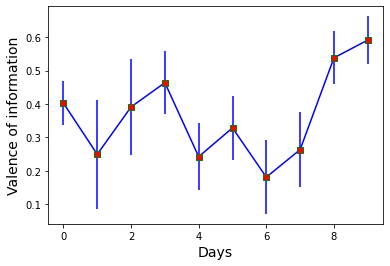

In [6]:
# plot the change in sentiment about dropbox related news on twitter, which should correspond to their stock prize (within margin of error)
fig = plt.figure()
x = np.arange(len(all_ratings))
y_General = np.array([])
yerr_General = np.array([])

for days in range(0, len(all_ratings)):
    y_General=np.append (y_General, all_ratings[days].mean())
    yerr_General=np.append (yerr_General, all_ratings[days].std()/np.sqrt(len(all_ratings[days])))

plt.errorbar(x, y_General, yerr=yerr_General, label='General opinion', marker='s', mfc='red',mec='green', color='blue')
plt.xlabel('Days', fontsize=14)
plt.ylabel('Valence of information', fontsize=14)


In [9]:
word_string = ''
for days in range(0, len(sentences_all)):
    for entries in range(0, len(sentences_all[days])):
        word_string= word_string+sentences_all[days][entries];


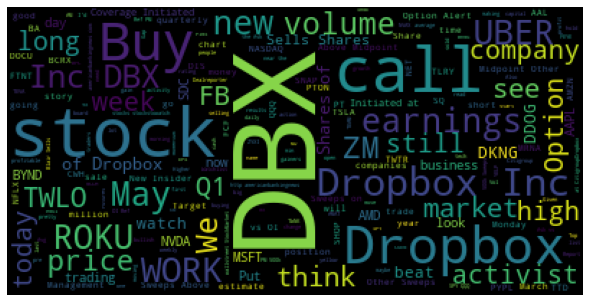

In [10]:
# show qualitatively the words that are most often used in respect to dropbox on twitter
wordcloud = WordCloud().generate(word_string)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 